# Naive Bayes and Support Vector Machines (SVM)

In today's lecture we will look at 2 classification methods - Naive Bayes and Support Vector Machines. Before we get started let's do some exercises on probability.

## Calculating Probabilities of Discrete Events

Discrete events deal with situations that have a distinct countable number of outcomes. Examples of this include: Flipping coin(s), rolling a dice, picking a card out of a deck, etc.

More formally, we can measure the probability of an event occuring using this formula:

$$P (Event) = \frac{len(event space)}{len(sample space)}$$

### Coding exercise

Write a function that calculates the probability of an event occuring in an event space. 

Ex. Given a sample space of a dice roll [1,2,3,4,5,6] and an event space of getting an odd number [1,3,5] how could I get the probability of rolling an odd number?





In [ ]:
##Coding Exercises (2 - 5 min)
def probability (eventspace, samplespace):
  return len(eventspace)/len(samplespace)

In [ ]:
## Create an event space for getting a number greater than 2 on a dice roll and use code above to calculate the probability
eventspace = [3,4,5,6]
samplespace = [1,2,3,4,5,6]
probability (eventspace, samplespace)

0.6666666666666666

# Conditional Probability

So far, we have taken a look at probabilities that weren't conditioned on an event occuring before it.

For example: The probability of flipping two heads is going to be different from the probability of flipping 2 heads given that the first coin toss was heads.

$$P(Two Heads) = P(Heads)*P(Heads)$$
$$P(Two Heads|First Toss  Was  Heads) = P(Heads)$$

# Exercises

Using the contingency table below:

*What is the probability of having lung cancer and smoking?*

$$P (Lung cancer \& Smoking) = \frac{75}{200}$$

*What is the probability of having lung cancer **given** you've smoked?*

$$P (Lung cancer | Smoking) = \frac{75}{100}$$

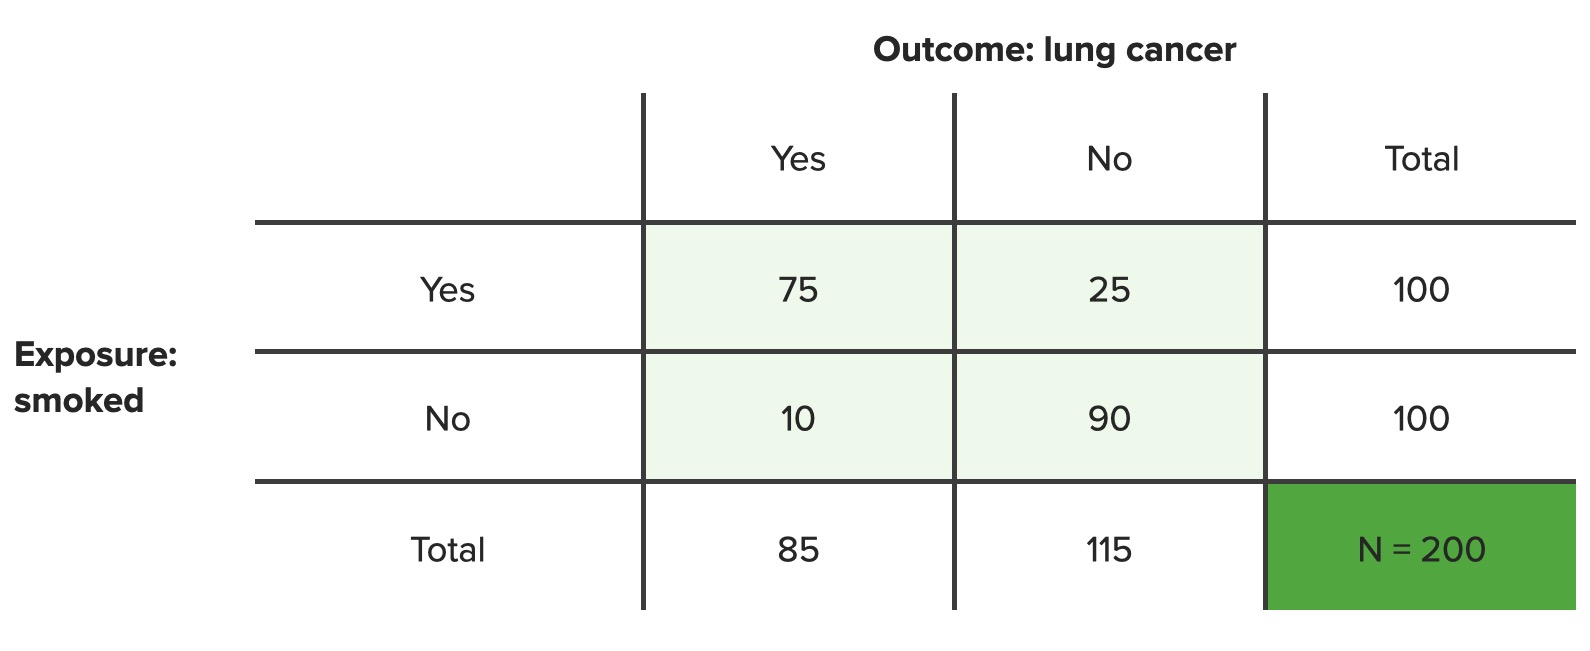

In [ ]:
from IPython import display
display.Image("https://cdn.lecturio.com/assets/Contingency-table-lung-cancer-N-200.jpg", width = 600, height = 300)


### Law of Total Probability
Drawing on Conditional Proabilities, the Law of Total Probability states that the probability of an event occuring can be written as:

$$P(A) = P(B)P(A|B) + P(C)P(A|C)....$$

$$P (Lung cancer) = P (Smoking) P (Lung cancer | Smoking) + P (!Smoking) P (Lung cancer | !Smoking) = \frac{1}{2}\frac{75}{100} + \frac{1}{2}\frac{10}{100} = \frac{75}{200} + \frac{10}{200} = \frac{85}{200} $$

### Exercise

What is the probability of picking a red ball from any of the urns below?

$$\small P (Red Ball) = P(Red Ball | Chose from Urn A)*P(Chose from Urn A) + P(Red Ball | Chose from Urn B)*P(Chose from Urn B)$$
$$\small P (Red Ball) = 0.7*0.5 + 0.1*0.5$$
$$\small P (Red Ball) = 0.4$$

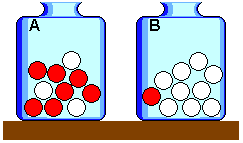

In [ ]:

display.Image("https://upload.wikimedia.org/wikipedia/commons/5/5b/Stochastik_Bayestheorem_Urnenversuch.png")

# Bayes Theorem

Going back to the example above, if you're wondering why $P(Two Heads|First Toss  Was  Heads) = P(Heads)$, we draw on **Bayes theorem** which gives us an equation for conditional Probability and is also the formula that Naive Bayes Classifiers use.

$$P(A|B) P(B) = P(B|A) P (A)$$

$$P(A|B) = \frac{P(B|A) P (A)}{P(B)}$$

$$P(rain|cloudy) = \frac{P(cloudy|rain) P (rain)}{P(cloudy)}$$


#### Monty Hall Problem

Assume that a room is equipped with three doors. Behind two are goats, and behind the third is a shiny new car. You are asked to pick a door, and will win whatever is behind it. Let's say you pick door 1. Before the door is opened, however, someone who knows what's behind the doors (Monty Hall) opens one of the other two doors, revealing a goat, and asks you if you wish to change your selection to the third door (i.e., the door which neither you picked nor he opened). The Monty Hall problem is deciding whether you do.

This is a very tricky conditional Probability Problem but the answer is to always switch the doors. Let's derive why below:

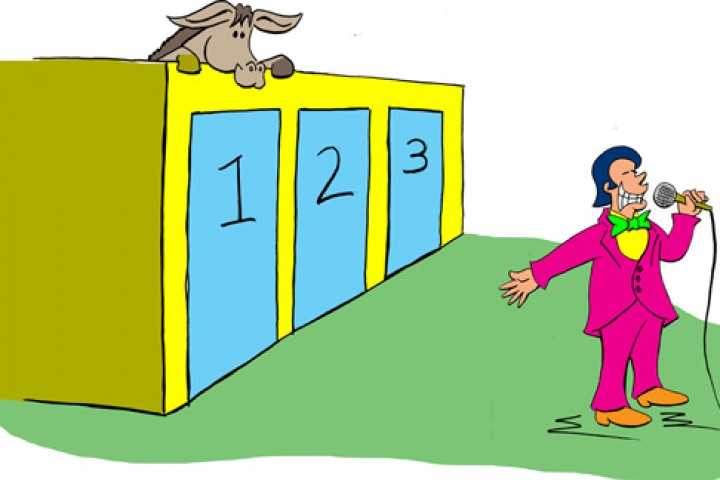

In [ ]:
display.Image("http://sciencefocus.ust.hk/wp-content/uploads/2015/11/montyanddoors-720x480.jpg", width = 600, height = 300)

### Situation

Let's say we pick door 1 and Monty decides to show us a goat behind door 2. What is the probability that the car is behind door 1 **given** that Monty decides to pick door 2 to show a goat?


$$\small\ P(Car Behind Door 1|Monty Shows Goat Behind Door 2) = \frac{P(Monty Shows Goat Behind Door 2 | Car Behind Door 1) * P (Car Behind Door 1)}{P(Monty Shows Goat Behind Door 2)}$$

Calculate:

P (Car Behind Door 1) = 1/3


P (Monty Shows Goat Behind Door2 | Car Behind Door 1) = 1/2

**This one's a little tricky:**
P (Monty Shows Goat Behind Door 2) = P (Monty Shows Goat Behind Door 2 | Car Behind Door 1) x P (CarBehindDoor1) 
<center> +


<center> P (Monty Shows Goat Behind Door 2 | Car **Not** BehindDoor1) x P (Car **Not** Behind Door 1)

P (Car **Not** Behind Door 1) = **2/3**

P (Monty Shows Goat Behind Door 2 | Car **Not** BehindDoor1) = P (Monty Shows Goat Behind Door 2 | Car Behind Door2 **Or** Car Behind Door 3)

P (Monty Shows Goat Behind Door 2 | Car **Not** BehindDoor1) = P (Monty Shows Goat Behind Door 2 | Car Behind Door2) +  P (Monty Shows Goat Behind Door 2 |Car Behind Door 3)

P (Monty Shows Goat Behind Door 2 | Car **Not** BehindDoor1) = **1/2**

**Plugging All Probabilities into Bayes gets:** 

$$P(Car Behind Door 1|Monty Shows Goat Behind Door 2) = \frac{(1/3)*(1/2)}{(1/3)*(1/2) + (2/3)*(1/2)}$$


$$P(Car Behind Door 1|Monty Shows Goat Behind Door 2) = 1/3$$


**Now let's consider the probability of the Car not being behind Door 1 given Monty picked Door 2 to show the goat.**

$$P(Car Not Behind Door 1|Monty Shows Goat Behind Door 2) = 1 - P(Car Behind Door 1|Monty Shows Goat Behind Door 2)$$

$$P(Car Not Behind Door 1|Monty Shows Goat Behind Door 2) = 1 - 1/3$$


$$P(Car Not Behind Door 1|Monty Shows Goat Behind Door 2) = 2/3$$

This is higher, which is why it is better to switch doors to increase your chances of getting the car!

#### Take Home Problem

Suppose that in the world exists a very rare disease. The chance for anyone to have this disease is 1%. We have a machine learning model to diagnose the disease and it is 99% accurate meaning that 99% of the people who have the disease will be diagnosed as positive, and 99% of the people who do not have the disease will be diagnosed negative. What is the probability that given a positive diagnosis from the ML model that the person actually has the disease?

**ANS: P(Having Disease | Positive Diagnosis) = 0.5**

$P(disease) = 0.01$ --> $P(!disease) = 0.99$

$P(positive|disease) = 0.99$

$P(negative|!disease) = 0.99$ --> $P(positive|!disease) = 0.01$

$P(disease|positive)$ = ?

$P(disease|positive) P(positive) = P(positive|disease) P(disease)$

$P(disease|positive) = \frac{P(positive|disease) P(disease)}{P(positive)}$

$P(positive) = P(positive|disease) P(disease) + P(positive|!disease) P(!disease)$

$P(positive) = (0.99)(0.01) + (0.01)*(0.99) = 0.0198$

$P(disease|positive) = \frac{(0.99)(0.01)}{0.0198}$

$P(disease|positive) = 0.5$


$P(y1|X) = \frac{P(X|y1) P(y1)}{P(X)}$

$P(y2|X) = \frac{P(X|y2) P(y2)}{P(X)}$

## Naive Bayes

- For years, best spam filtering methods used naive Bayes.
- Our first probabilistic classifier where we **think of learning as a problem of statistical inference**.

- Classification technique based on Bayes’ Theorem **with an assumption of independence among predictors** - hence the Naive. 
    - The presence of a particular feature in a class is unrelated to the presence of any other feature.
    - This is like saying: If you are hungry the probability of the symptoms(growling stomach, mouth watering, weakness,...) manifesting are independant 

E.g. You receive a spam mail that contains the words "Money", "URGENT!", "Prize!". Even if these features depend on each other or others, all of these properties independently contribute to the probability that this email is SPAM.

- Naive Bayes is easy to build and useful for very large data sets. 

- Naive Bayes outperforms even highly sophisticated classification methods and works well with text data.

### Probabilistic classifiers: `predict` by hand 

- What's it doing under the hood? 
- Let's look at an example with a toy dataset. 

In [ ]:
import IPython
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import HTML

%pylab inline

from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import (
    CountVectorizer,
    TfidfTransformer,
    TfidfVectorizer,
)

# train test split and cross validation
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)

from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB

pd.set_option("display.max_colwidth", 200)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [ ]:
X = [
    "URGENT!! As a valued network customer you have been selected to receive a £900 prize reward!",
    "Lol you are always so convincing.",
    "Block 2 has interesting courses.",
    "URGENT! You have won a 1 week FREE membership in our £100000 prize Jackpot!",
    "Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free!",
    "Block 2 has been interesting so far.",
]
y = ["spam", "non spam", "non spam", "spam", "spam", "non spam"]

In [ ]:
pipe_nb_toy = make_pipeline(CountVectorizer(max_features = 4, stop_words='english'), MultinomialNB())
pipe_nb_toy.fit(X, y);

In [ ]:
data = pipe_nb_toy['countvectorizer'].transform(X)
train_bow_df = pd.DataFrame(data.toarray(), columns=pipe_nb_toy['countvectorizer'].get_feature_names(), index=X)
train_bow_df['target'] = y

C:\Users\Brian.Lynch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
train_bow_df

,block,free,prize,urgent,target
URGENT!! As a valued network customer you have been selected to receive a £900 prize reward!,0,0,1,1,spam
Lol you are always so convincing.,0,0,0,0,non spam
Block 2 has interesting courses.,1,0,0,0,non spam
URGENT! You have won a 1 week FREE membership in our £100000 prize Jackpot!,0,1,1,1,spam
Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free!,0,1,0,0,spam
Block 2 has been interesting so far.,1,0,0,0,non spam


Suppose we are given text messages in `deploy_test` and we want to find the targets for these examples, how do we do it using naive Bayes?

First, let's get numeric representation of our text messages. 

In [ ]:
deploy_test = ["URGENT! Free!!", "I like Week 5 block better."]
data = pipe_nb_toy['countvectorizer'].transform(deploy_test).toarray()
bow_df = pd.DataFrame(data, columns=pipe_nb_toy['countvectorizer'].get_feature_names(), index=deploy_test)
bow_df

C:\Users\Brian.Lynch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,block,free,prize,urgent
URGENT! Free!!,0,1,0,1
I like Week 5 block better.,1,0,0,0


### Naive Bayes prediction idea

Suppose we want to predict whether the following message is "spam" or "non spam".
> "URGENT! Free!!"

Representation of the message: `[0, 1, 0, 1]`

To predict the correct class, naive Bayes calculates the following probability scores using Bayes Theorem. 

- $P(\text{spam} \mid \text{block} = 0, \text{free} = 1, \text{prize} = 0, \text{urgent=1})$ 
- $P(\text{non spam} \mid  \text{block} = 0, \text{free} = 1, \text{prize} = 0, \text{urgent=1})$
- **Picks the label with higher probability scores**. 

### Applying Bayes' theorem 

Uses Bayes' theorem to calculate probabilities:

$$P(A \mid B) = \frac{P(B \mid A) \times P(A)}{P(B)}$$

$$P(\text{spam} \mid \text{message})= \frac{P(\text{block} = 0, \text{free} = 1, \text{prize} = 0, \text{urgent} = 1 \mid \text{spam}) \times P(\text{spam})}{P(\text{block} = 0, \text{free} = 1, \text{prize} = 0, \text{urgent=1})}$$

$$P(\text{non spam} \mid \text{message}) = \frac{P(\text{block} = 0, \text{free} = 1, \text{prize} = 0, \text{urgent} = 1 \mid \text{non spam}) \times P( \text{non spam})}{P(\text{block} = 0, \text{free} = 1, \text{prize} = 0, \text{urgent=1})}$$

- $P(\text{message})$: marginal probability that a message has the given set of words 
    - Hard to calculate but can be ignored in our scenario as it occurs in the denominator for both $P(\text{spam} \mid \text{message})$ and $P(\text{non spam} \mid \text{message})$.
    - So we ignore the denominator in both cases. 


### Naive Bayes' approximation to calculate $P(\text{message}|\text{spam})$

- A common assumption is **naive Bayes** assumption, which states that **features are independent, conditioned on the target**. 
    - Example: In our spam classification example, **once you know that a message is spam**, the probability that the word "urgent" appears is independent of whether "free" also appeared. Think back to our analogy of getting hungry and the symptoms associated with that...
    
- We can write this mathematically as 

$$\begin{equation}
\begin{split}
& P(\text{block} = 0, \text{free} = 1, \text{prize} = 0, \text{urgent} = 1 \mid \text{spam}) \\
&\approx P(\text{block} = 0 \mid \text{spam}) \times P(\text{free} = 1 \mid \text{spam}) \times P(\text{prize} = 0 \mid \text{spam}) \times P(\text{urgent} = 1 \mid \text{spam})
\end{split}
\end{equation}$$

### Going back to estimating $P(\text{spam} \mid \text{message})$

With naive Bayes' assumption, to calculate $P(\text{spam} \mid \text{block} = 0, \text{free} = 1, \text{prize} = 0, \text{urgent} = 1)$, we need the following:  
1. Prior probability: $P(\text{spam})$ 
2. Conditional probabilities: 
    1. $P(\text{block} = 0 \mid \text{spam})$
    2. $P(\text{free} = 1 \mid \text{spam})$
    3. $P(\text{prize} = 0 \mid \text{spam})$
    4. $P(\text{urgent} = 1 \mid \text{spam})$

We use our training data to calculate these probabilities. 

## Take Home

Calculate by hand what P (spam | message) is ignoring the denominator.

**ANS: 0.07407407407407407**

### Estimating $P(\text{non spam} \mid \text{message})$

$$\begin{equation}
\begin{split}
P(\text{non spam} \mid \text{message}) &\propto P(\text{block} = 0, \text{free} = 1, \text{prize} = 0, \text{urgent} = 1 \mid \text{non spam}) \times P(\text{non spam})\\
&\propto P(\text{block} = 0 \mid \text{non spam}) \times P(\text{free} = 1 \mid \text{non spam}) \\
& \times P(\text{prize} = 0 \mid \text{non spam}) \times P(\text{urgent} = 1 \mid \text{non spam}) \times P(\text{non spam})\\
&\propto 1/3 \times 0 \times 3/3 \times 0 \times 1/3\\
\end{split}
\end{equation}$$

### Naive Bayes prediction

Since $(\text{spam} \mid \text{message})$ (0.074) is proportional to a larger number compared to $(\text{non spam} \mid \text{message})$ (0), we predict $spam$! 

## NOTE: Laplace Smoothing

- When we calculated $P(\text{non spam} \mid \text{message})$, some of our conditional probabilities were zero. 
    - $P(\text{free} = 1 \mid \text{non spam}) = 0/3$ 
    - $P(\text{urgent} = 1 \mid \text{non spam}) = 0/3$

- Naive Bayes naively multiplies all the feature likelihoods together, and if any of the terms is zero, it's going to void all other evidence and the probability of the class is going to be zero. 
- This is problematic! 
- **We have limited data and if we do not see a feature occurring with a class, it doesn't mean it would never occur with that class**. 

### Adjusting the counts 

Note that the following calculations would change now with updated counts now: 

$$P(\text{word} \mid \text{spam}) = \frac{Count(\text{word}, \text{spam}) + \alpha}{\sum_{w \in vocabulary} Count(w, \text{spam}) + \alpha|vocabulary|}$$

### `alpha` hyperparameter and the fundamental tradeoff 

- High alpha $\rightarrow$ underfitting
    - means we are adding large counts to everything and so we are diluting the information from the data
- Low alpha $\rightarrow$ overfitting
- Read more [here](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)

###  Gaussian Naive Bayes

- If a dataset has continuous-valued features.
- But so far, we've only seen how to use Naive Bayes for discrete features.
- We can either discretize our continuous features into discrete bins (with counts), or...
- Use _Gaussian_ naive Bayes (read more [here](https://machinelearningmastery.com/naive-bayes-for-machine-learning/) and [here](https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Gaussian_naive_Bayes))

- Gaussian naive Bayes assumes features are normally distributed
    - Are our features normal?
    - Not really but in practice we transform our data to try and make it more normal
    - Scikit-learn provides the `PowerTransformer()` for this process
    - From the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer): "*...Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like.*"    

### Pros of naive Bayes

- Surprising accuracy 
- A fast and robust way to learn the corresponding parameters
- Scales great; learning a naive Bayes classifier is just a matter of counting how many times each attribute co-occurs with each class
- Can be easily used for multi-class classification. 
- It's closely related to linear classifiers we'll see in the next lecture. 
    - When we take the logarithms, the products (from the Naive bayes assumption) turn into summations. 
- Can provides a informative set of features from which to predict the class (next class)

### Cons of naive Bayes

- Assumes that spammers generate e-mails by picking words at random. It means that sentences have no syntax and content. Is that a fair assumption? 
    - oversimplification 
    - sometimes the best theories are the most oversimplified, provided their predictions are accurate, because they explain the most with the least. 


# In Class Activity: Let's Implement a Naive Bayes Classifier using a Count Vectorizer!

In [ ]:
# Import Dependencies
import re
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set(stopwords.words('english'))
import string
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Brian.Lynch\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Brian.Lynch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Load Data
url = 'spam.csv'
df = pd.read_csv(url, encoding="ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# Cleaning Pipeline - Drop Useless columns, reformat df, Contraction Removal, Stopwords, Punctuations, lowercasing
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df = df.rename(columns={"v1": "target", "v2": "sms"})
df = df.dropna()

In [ ]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\’t", "will not", phrase)
    phrase = re.sub(r"can\’t", "can not", phrase)
    phrase = re.sub(r"good morning", "good_morning", phrase)
    phrase = re.sub(r"thank you", "thank_you", phrase)
    phrase = re.sub(r"didn’t", "did not", phrase)

    # general
    phrase = re.sub(r"n\’t", " not", phrase)
    phrase = re.sub(r"\’re", " are", phrase)
    phrase = re.sub(r"\’s", " is", phrase)
    phrase = re.sub(r"\’d", " would", phrase)
    phrase = re.sub(r"\’ll", " will", phrase)
    phrase = re.sub(r"\’t", " not", phrase)
    phrase = re.sub(r"\’ve", " have", phrase)
    phrase = re.sub(r"\’m", " am", phrase)
    return phrase

In [ ]:
def remove_stopwords(Words):
  x = Words.split()
  y = [word for word in x if word not in stop_words]
  return (' '.join(y))

In [ ]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [ ]:
df['text_clean'] = df['sms'].apply(lambda x: decontracted(str(x)))
df["text_clean"] = df['text_clean'].apply(lambda x: remove_punctuations(x))
df["text_clean"] = df["text_clean"].apply(lambda x: remove_stopwords(x))
df['text_clean'] = df['text_clean'].str.strip()
df["text_clean"] = df["text_clean"].apply(lambda x: x.lower())

In [ ]:
# Train/Test Split
train_df, test_df = train_test_split(df, test_size=0.5, random_state=123)
X_train, y_train = train_df["text_clean"], train_df["target"]
X_test, y_test = test_df["text_clean"], test_df["target"]

print(X_train.shape)

(2786,)


In [ ]:
#Set Up Pipeline
pipe_nb = make_pipeline(CountVectorizer(), MultinomialNB())


In [ ]:
# Train Model and Check Score
pipe_nb.fit(X_train, y_train)
print("Training Acc.: ", pipe_nb.score(X_train,y_train))

Training Acc.:  0.9946159368269921


In [ ]:
# Test Model and Check Score
print("Valid Acc.: ", pipe_nb.score(X_test,y_test))

Valid Acc.:  0.9834888729361091


## Support Vector Machines

In [ ]:
! pip install git+https://github.com/mgelbart/plot-classifier


  Cloning https://github.com/mgelbart/plot-classifier to c:\users\brian.lynch\appdata\local\temp\pip-req-build-4y83vvi8
  Resolved https://github.com/mgelbart/plot-classifier to commit f9224499c1724fcad7b1fe1c933a38aff5f9d8fa
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for plot-classifier: filename=plot_classifier-0.1-py3-none-any.whl size=3416 sha256=5b836f17c3b448b4805eabb85a7d138603b751945561017f00c744f679fb6048
  Stored in directory: C:\Users\Brian.Lynch\AppData\Local\Temp\pip-ephem-wheel-cache-1egvheqm\wheels\0a\e3\d8\a45a6d3b3e62bc178ce9b059a1b01d09508b8f9eb7eb7262ef
Successfully built plot-classifier


  Running command git clone --filter=blob:none --quiet https://github.com/mgelbart/plot-classifier 'C:\Users\Brian.Lynch\AppData\Local\Temp\pip-req-build-4y83vvi8'


In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC, SVR, LinearSVC

# Other
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import plot_classifier as plot_clf

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

- Similarity-based algorithm.
- Superficially, SVMs are more like weighted $k$-NNs. $k$-NNs are the Supervised Learning cousin of K-means.
    - The decision boundary is defined by **a set of positive and negative examples** and **their weights** together with **their similarity measure**. 
    - A test example is a positive if on average it looks more like positive examples than the negative examples. 

- What makes SVMs special is that they **only remember key examples (support vectors)**. So it's more efficient than other similarity-based algorithms.

- SVMs use a similarity metric which is called a "kernel" in SVM land. A popular kernel is Radial Basis Functions (RBFs) which we will use today. - More on this towards the end
- https://en.wikipedia.org/wiki/Radial_basis_function_kernel

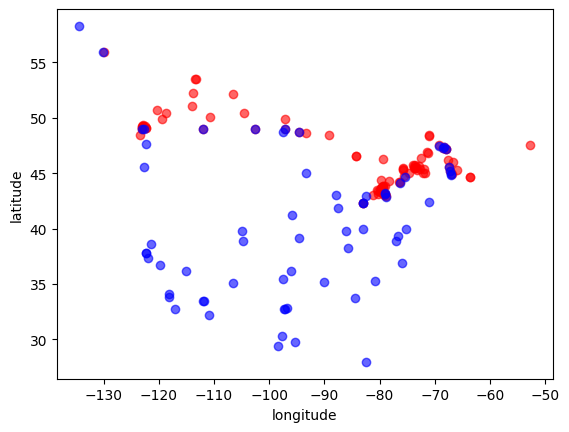

In [ ]:
cities_df = pd.read_csv('https://raw.githubusercontent.com/UBC-MDS/DSCI_571_sup-learn-1/master/lectures/data/canada_usa_cities.csv')
train_df, test_df = train_test_split(cities_df, test_size=0.2, random_state=123)
canada = train_df.query('country == "Canada"')
usa = train_df.query('country == "USA"')
plt.scatter(canada["longitude"], canada["latitude"], color="red", alpha=0.6)
plt.scatter(usa["longitude"], usa["latitude"], color="blue", alpha=0.6)
plt.ylabel("latitude")
plt.xlabel("longitude");

In [ ]:
# split into training/validation and testing set
X_train, y_train = train_df.drop(columns=['country']), train_df['country']
X_test, y_test = test_df.drop(columns=['country']), test_df['country']

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf',gamma=0.2) # Ignore gamma for now
svm.fit(X_train, y_train)
print("Train scores: ", round(svm.score(X_train, y_train), 4))
print("Test scores: ", round(svm.score(X_test, y_test), 4))

Train scores:  0.8683
Test scores:  0.7143


C:\Users\Brian.Lynch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


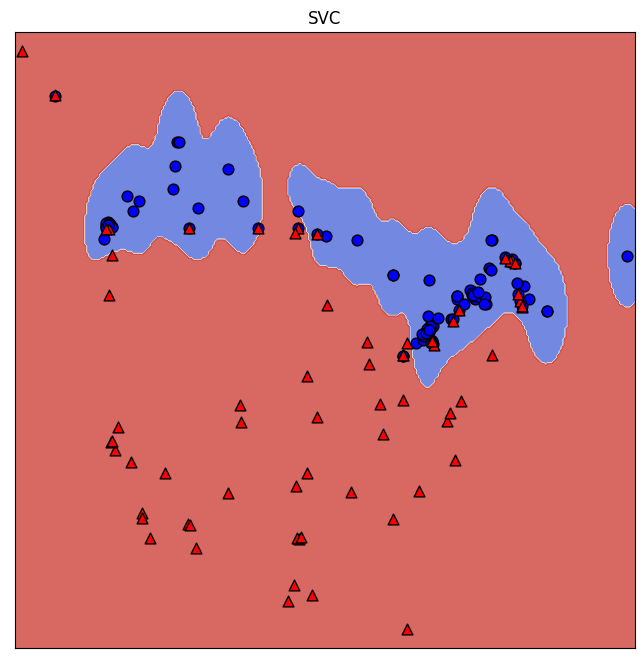

In [ ]:
# You can think of SVM with RBF kernel as "smooth KNN"
plt.figure(figsize=(8, 8))
plt.title("SVC")
plot_clf.plot_classifier(X_train, y_train, svm, ax=plt.gca());

#### Support vectors 

- Each training example either is or isn't a "support vector".
  - This gets decided during `fit`.

- **Main insight: the decision boundary only depends on the support vectors.**

- Let's look at the support vectors. 

SVM is going to leverage the dataset and find the best values **$w^{(*)}$** and **$b^{(*)}$** for parameters $w$ and $b$. 

Then, the learning algorithm is defined as:

> $f(x) = sign(w^{(*)}x − b^{(*)})$

If you get +1, then, the class is a positive review. If you get a -1, then, you have a negative class. 

We want a hyperplane that separates positive examples from negative ones with the **largest margin**. 

If the margin or decision boundary is large, it contributes to a better generalization, that is how well the model will classify new examples in the future. 

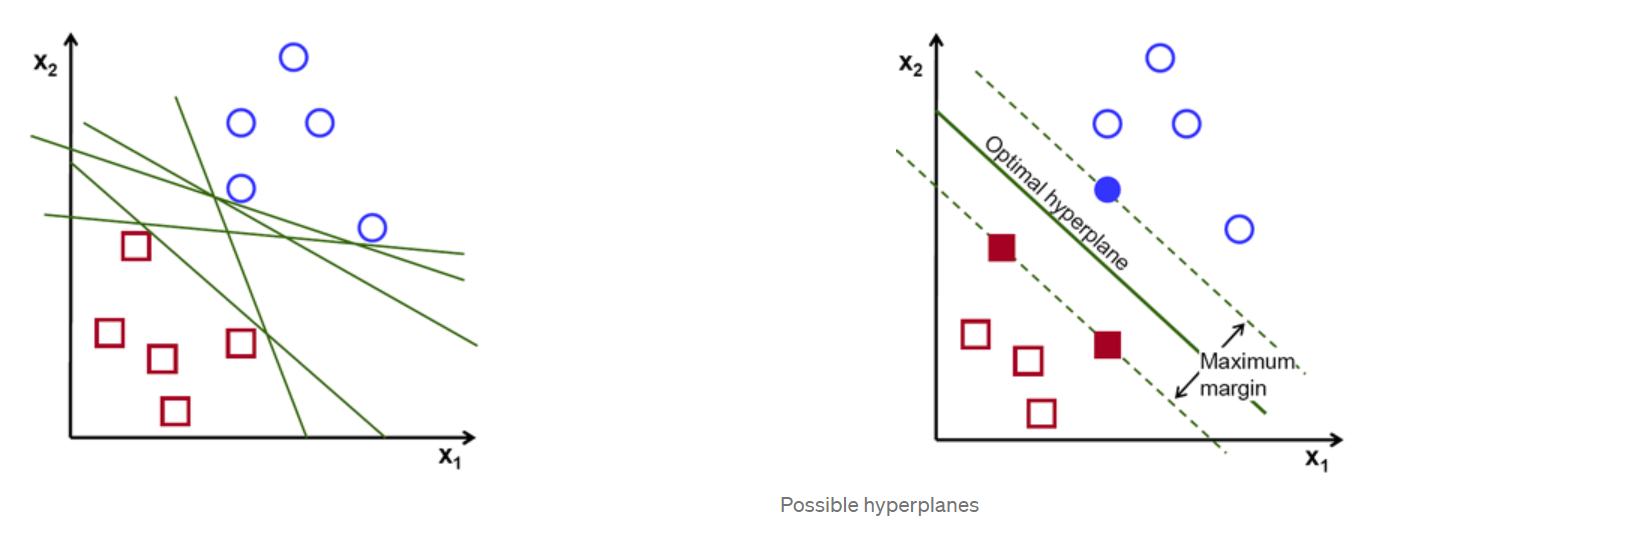

For two-dimensional feature vectors, we can easily visualize the solution. The blue and orange circles represent, respectively, positive and negative examples. The line given by $wx − b = 0$ is the decision boundary.

That’s how Support Vector Machines work. This particular version of the algorithm builds the so-called linear model. It’s called linear because the decision boundary is a straight line (or a plane, or a hyperplane).

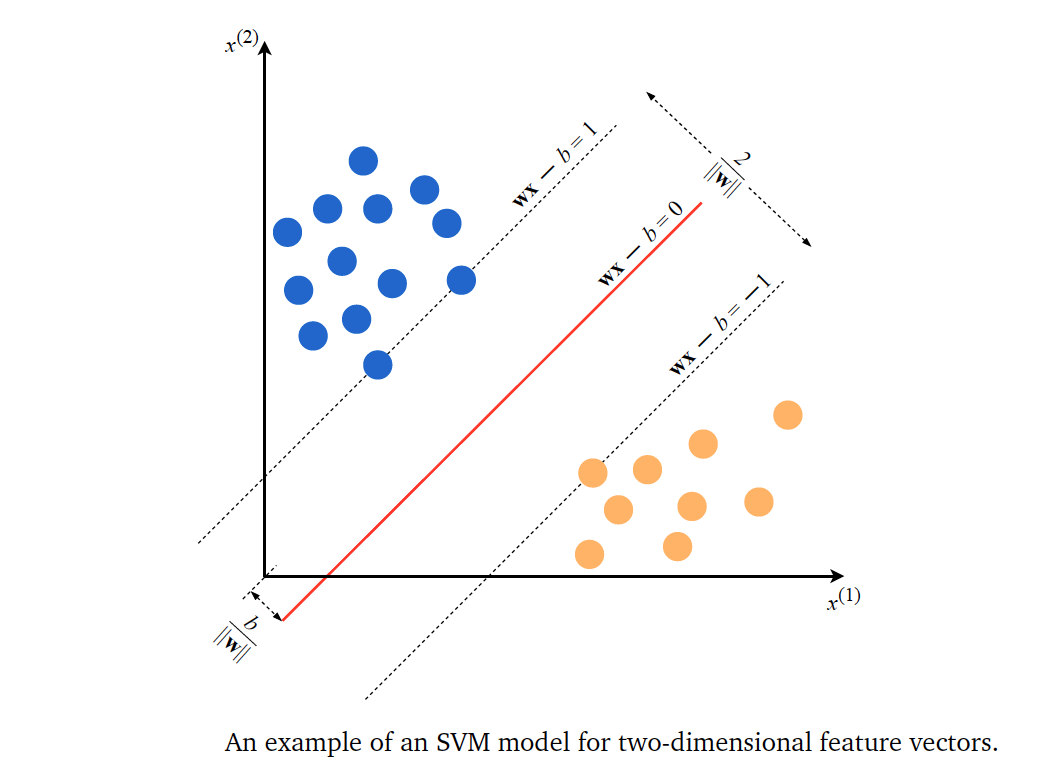

In [ ]:
# demo with a synthetic data set
n = 20
X = np.random.randn(n,2)
y = np.random.choice((-1,+1),size=n)
X[y>0,0] -= 2
X[y>0,1] += 2

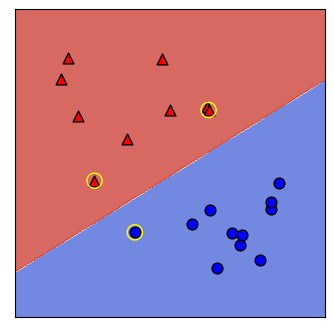

In [ ]:
svm = SVC(kernel="linear") # ignore the C=1e6 for now
svm.fit(X,y)

plt.figure(figsize=(4,4))
plot_clf.plot_classifier(X,y,svm, ax=plt.gca())
plt.scatter(*svm.support_vectors_.T, marker="o", edgecolor="yellow", facecolor="none", s=120);

- The support vectors (SVs) are shown in yellow.
- These are the example that "support" the boundary. 

Below: let's try removing all other examples, keeping only the SVs.

In [ ]:
sv = svm.support_
not_sv = list(set(range(n)) - set(sv))

[[-0.67900034  1.16469037]]
[[-0.74730083  1.28149245]]
The coefficients are the same!


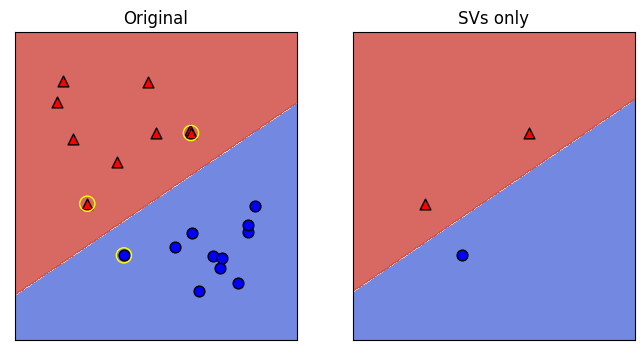

In [ ]:
# remove all non-support vectors
X3 = np.delete(X,not_sv,0)
y3 = np.delete(y,not_sv,0)

svm3 = SVC(kernel="linear", C=1e6)
svm3.fit(X3,y3)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_clf.plot_classifier(X,y,svm, ax=plt.gca())
plt.scatter(*svm.support_vectors_.T, marker="o", edgecolor="yellow", facecolor="none", s=120);
plt.title("Original");
plt.subplot(1,2,2)
plot_clf.plot_classifier(X3,y3,svm3, ax=plt.gca(), lims=(X[:,0].min()-1,X[:,0].max()+1,X[:,1].min()-1,X[:,1].max()+1))
plt.title("SVs only");

print(svm.coef_)
print(svm3.coef_)
print("The coefficients are the same!")

[[-0.67900034  1.16469037]]
[[-0.56956798  0.97766762]]


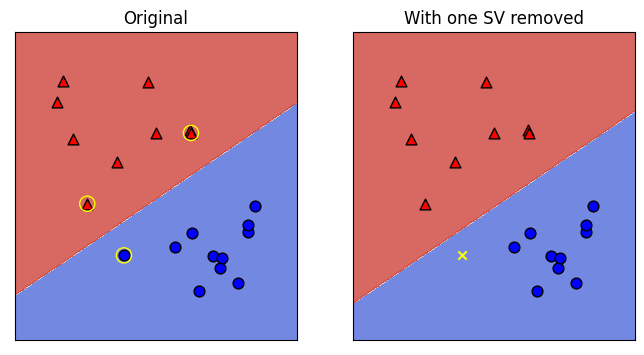

In [ ]:
# remove a support vector
X2 = np.delete(X,sv[0],0)
y2 = np.delete(y,sv[0],0)

svm2 = SVC(kernel="linear", C=1e6)
svm2.fit(X2,y2);

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_clf.plot_classifier(X,y,svm, ax=plt.gca())
plt.scatter(*svm.support_vectors_.T, marker="o", edgecolor="yellow", facecolor="none", s=120);
plt.title("Original");

plt.subplot(1,2,2)
plot_clf.plot_classifier(X2,y2,svm2, ax=plt.gca())
# plt.scatter(*svm2.support_vectors_.T, marker="o", edgecolor="yellow", facecolor="none", s=120);
plt.scatter(svm.support_vectors_[0,0], svm.support_vectors_[0,1], marker="x", c="yellow")
plt.title("With one SV removed");

print(svm.coef_)
print(svm2.coef_)

- The **margin** is the distance from the boundary to the nearest point(s).
- Maximizing the margin is a "maximin" problem: maximize the minimum distance to the boundary.
- Intuitively, more margin is good because it leaves more "room" before we make an error.
- Above: it looks like SVM maximizes the margin.
- QUESTION: What does linear regression do?

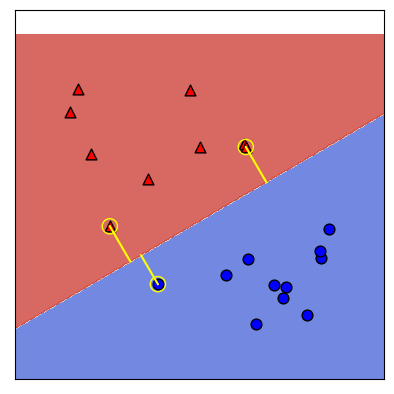

In [ ]:
plt.figure()
plot_clf.plot_classifier(X, y, svm, ax=plt.gca());
plt.scatter(*svm.support_vectors_.T, marker="o", edgecolor="yellow", facecolor="none", s=120);
plt.axis('equal');
plt.axis('square');

def SV_proj(svm):
    v = svm.support_vectors_
    s = np.array([svm.coef_.flatten()[1], -svm.coef_.flatten()[0]])
    w = svm.coef_
    return (v@s[:,None])/(s@s) * s - w/(w@w.T)*svm.intercept_
proj = SV_proj(svm)

for i in range(len(proj)):
    p = proj[i]
    sv = svm.support_vectors_[i]
    plt.plot((p[0],sv[0]),(p[1],sv[1]), 'yellow')

### Hyperparameters of SVM 

- Key hyperparameters of `rbf` SVM are
    - `gamma`
    - `C`
    
- We are not equipped to understand the meaning of these parameters at this point but you are expected to describe their relation to the fundamental tradeoff. 

See [`scikit-learn`'s explanation of RBF SVM parameters](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html). 

### Relation of `gamma` and the fundamental trade-off

- `gamma` controls the complexity (fundamental trade-off), just like other hyperparameters we've seen.
  - larger `gamma` $\rightarrow$ more complex $\rightarrow$ can lead to overfitting
  - smaller `gamma` $\rightarrow$ less complex $\rightarrow$ can lead to underfitting

### Relation of `C` and the fundamental trade-off

- `C` _also_ affects the fundamental tradeoff
    - larger `C` $\rightarrow$ more complex $\rightarrow$ can lead to overfitting
    - smaller `C` $\rightarrow$ less complex $\rightarrow$ can lead to underfitting

**C helps us deal with Noise**

To extend SVM to cases in which the data is not linearly separable, we introduce the Hinge Loss Function: 

$max(0, 1− y_i(wx_i − b))$. *don't worry too much about this.

The Hinge Loss Function is zero if $wx_i$ lies on the correct side of the decision boundary. 
For data on the wrong side of the decision boundary, the function’s value is proportional to the distance from the decision boundary.


By changing the Hyperparamenter C, we determine the tradeoff between increasing the size of the decision boundary and trying to get each $x_i$ in the correct side of the decision boundary. 

SVMs that optimize hinge loss are called **soft-margin SVMs**, while the original formulation is referred to as a **hard-margin SVM**.

For sufficiently high values of C, the second term in the cost function will become negligible, so the SVM algorithm will try to find the highest margin by completely ignoring misclassification. As we decrease the value of C, making classification errors is becoming more costly, so the SVM algorithm tries to make fewer mistakes by sacrificing the margin size. **A larger margin is better for generalization.**

C regulates the tradeoff between classifying the training data well (minimizing empirical risk) and classifying future examples well (generalization).

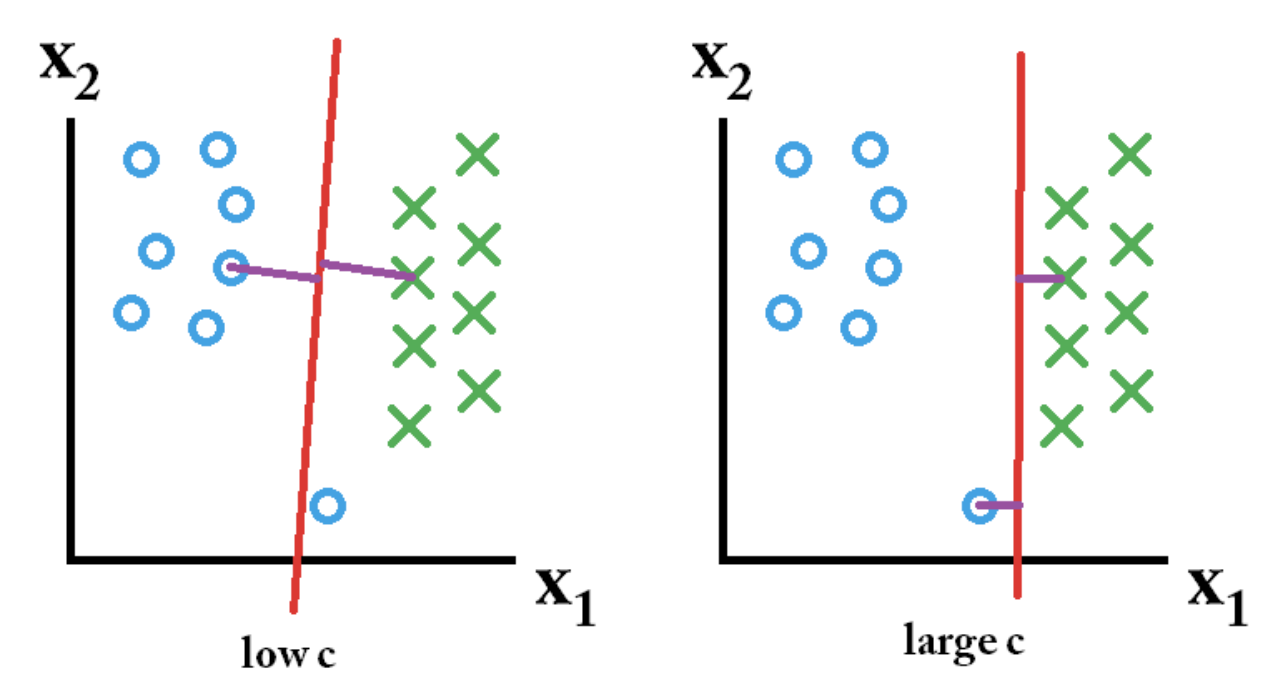

### The Kernel Trick

1. What if there’s noise in the data and no hyperplane can perfectly separate positive examples from negative ones?
2. What if the data cannot be separated using a plane, but could be separated by a higher-order polynomial?

SVM can also incorporate kernels that can make the decision boundary arbitrarily non-linear. In some cases, it could be impossible to perfectly separate the two groups of points because of noise in the data, errors of labeling, or outliers. 

You can see both situations in the next figure. In the left case, the data could be separated by a straight line if not for the noise (outliers or examples with wrong labels). 

In the right case, the decision boundary is a circle and not a straight line.

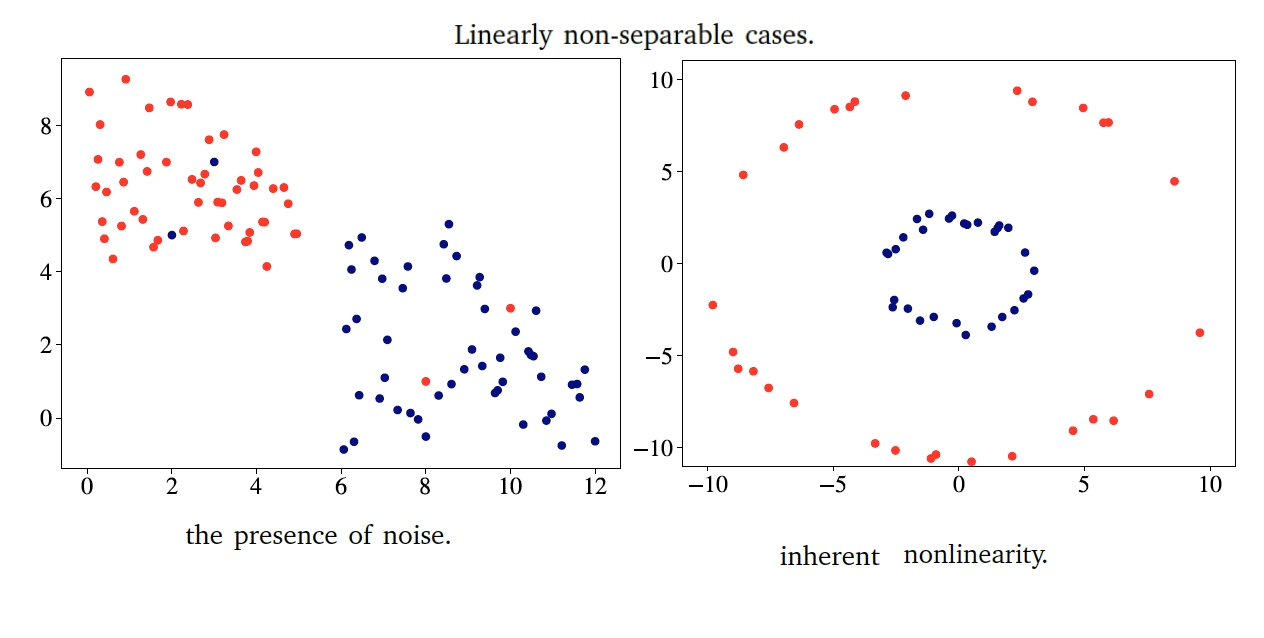

**Dealing with Inherent Non-Linearity**
SVM can be adapted to work with datasets that cannot be separated by a hyperplane in its original space. Indeed, if we manage to transform the original space into a space of higher dimensionality, we could hope that the examples will become linearly separable in this transformed space. In SVMs, using a function to implicitly transform the original space into a higher dimensional space during the cost function optimization is called the kernel trick.

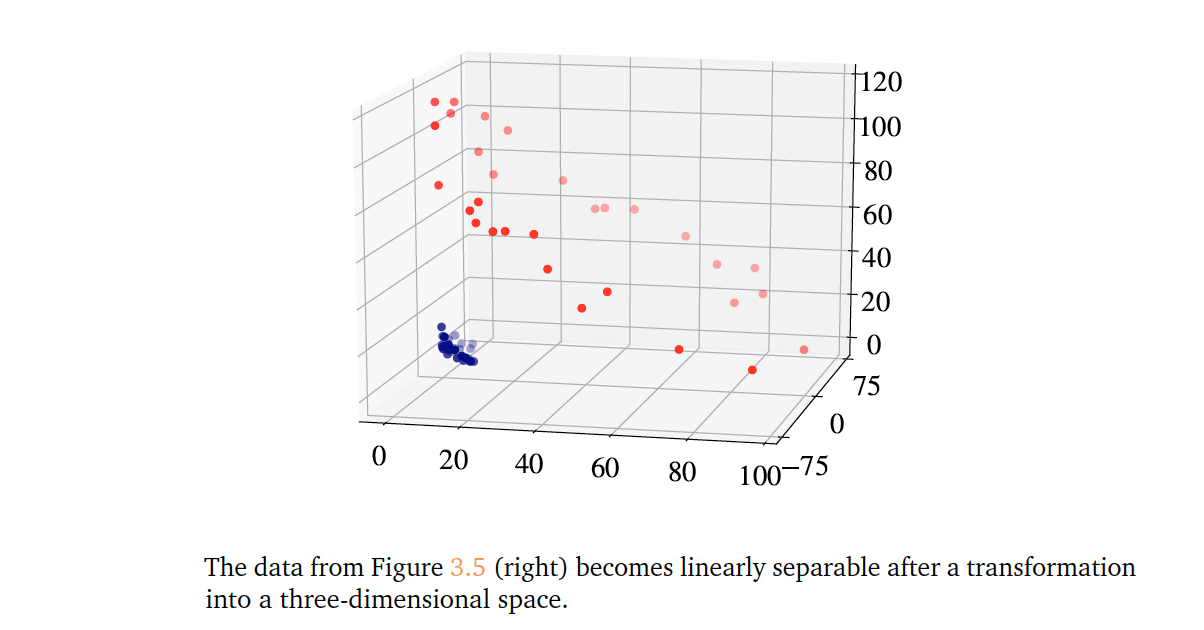

It’s possible to transform a two-dimensional non-linearly-separable data into a linearly-separable threedimensional
data using a specific mapping. For example: 2D data into a 3D space. Now, the data becomes
linearly separable in the transformed space.

However, we don’t know a priori which mapping would work for our data. 



By using the kernel trick, we can get rid of a costly transformation of original feature vectors into higher dimensional vectors and avoid computing their dot-product.

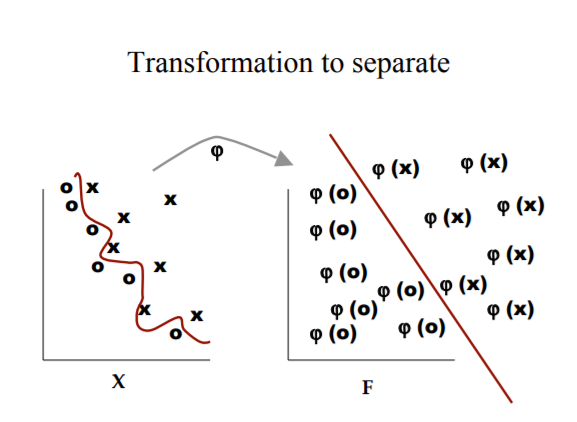


src: http://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf

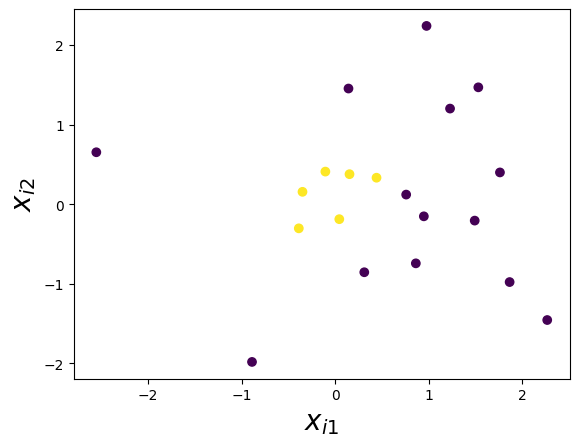

In [ ]:
n = 20
d = 2
np.random.seed(0)
X = np.random.randn(n,d)
y = np.sum(X**2,axis=1) < 0.4

plt.scatter(X[:,0], X[:,1], c=y);
plt.xlabel("$x_{i1}$", fontsize=20);
plt.ylabel("$x_{i2}$", fontsize=20);

Training accuracy 1.0


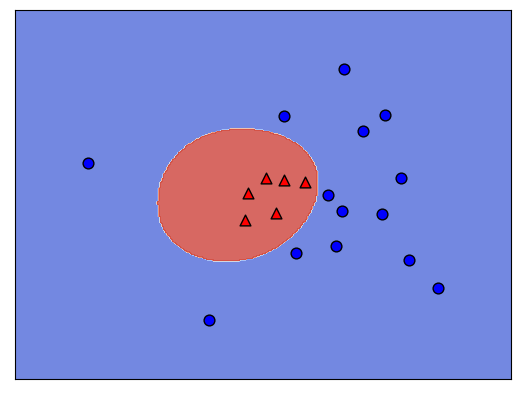

In [ ]:
svm = SVC(kernel="rbf")
svm.fit(X,y)

plot_clf.plot_classifier(X,y,svm)

print("Training accuracy", svm.score(X,y))

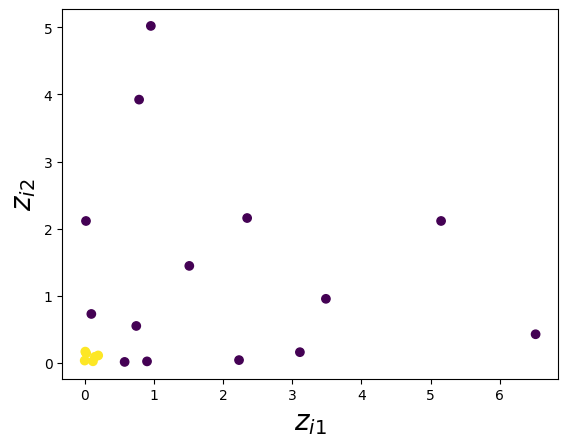

In [ ]:
Z = X**2

plt.scatter(Z[:,0], Z[:,1], c=y);
plt.xlabel("$z_{i1}$", fontsize=20);
plt.ylabel("$z_{i2}$", fontsize=20);

Training accuracy 1.0


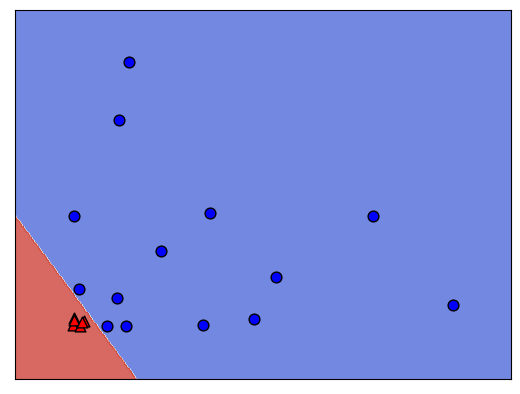

In [ ]:
svm = SVC(kernel="linear", C=100)
svm.fit(Z,y)

plot_clf.plot_classifier(Z,y,svm)

print("Training accuracy", svm.score(Z,y))

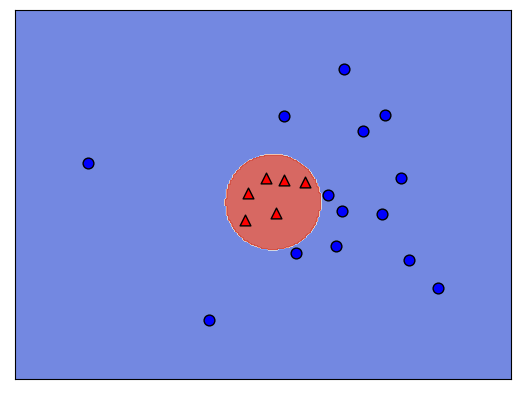

In [ ]:
plot_clf.plot_classifier(X, y, svm, transformation=lambda X: X**2);

## Take Home Assignment:

Run an SVM on the spam dataset. Make sure to clean data, run appropriate train/test split, check accuracy and visualize results